In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
from Raices import *
from EDOS import *
from Estadistica import *
from Integrales import *
from Interpolacion import *
from Diferenciacion import *

Chi Cuadrada


El valor para chi^2 es  13464.067050835733
El valor para chi^2 por grado de libertad es:  1683.0083813544666
El valor de los parámetros c_i son  [1.49740166 0.09272402]


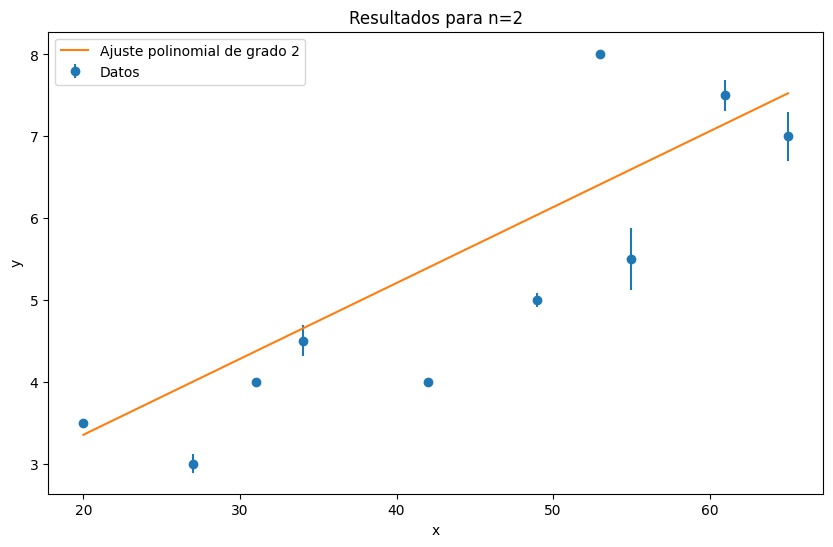


El valor para chi^2 es  3235.889339291492
El valor para chi^2 por grado de libertad es:  462.2699056130703
El valor de los parámetros c_i son  [ 9.03675662e+00 -4.25889478e-01  7.52088802e-03]


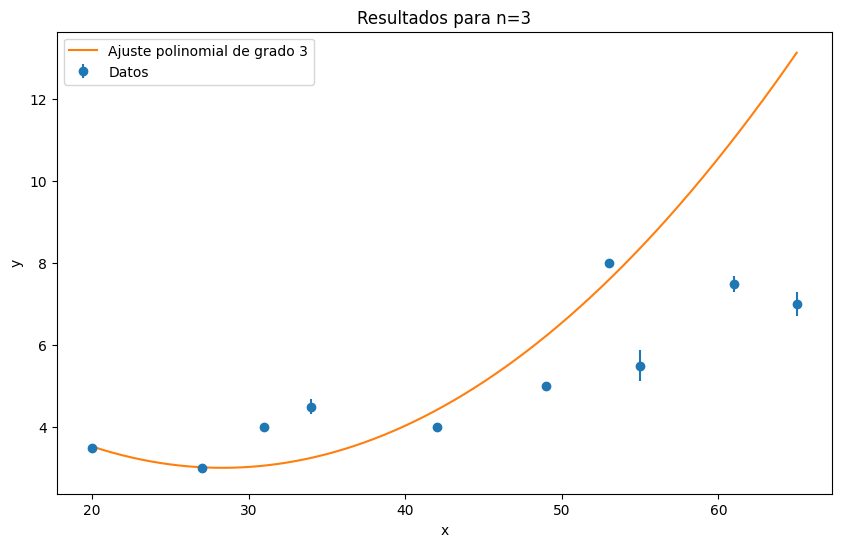

([array([1.49740166, 0.09272402]),
  array([ 9.03675662e+00, -4.25889478e-01,  7.52088802e-03])],
 [array([0.01726673, 0.00056315]),
  array([7.65213708e-02, 5.15879082e-03, 7.43652410e-05])],
 [array([[ 2.98139907e-04, -8.93406963e-06],
         [-8.93406963e-06,  3.17142809e-07]]),
  array([[ 5.85552020e-03, -3.91212451e-04,  5.54376801e-06],
         [-3.91212451e-04,  2.66131228e-05, -3.81342026e-07],
         [ 5.54376801e-06, -3.81342026e-07,  5.53018907e-09]])])

In [3]:
dataxs = np.array([34, 27, 65, 20, 53, 49, 42, 31, 55, 61])
datays = np.array([4.5, 3, 7, 3.5, 8, 5, 4, 4, 5.5, 7.5])

def plotresults(dataxs, datays, datasigs, cs, n):
    x = np.linspace(min(dataxs), max(dataxs), 1000)
    y = sum(c*x**i for i, c in enumerate(cs))

    plt.figure(figsize=(10,6))
    plt.errorbar(dataxs, datays, yerr=datasigs, fmt='o', label='Datos')
    plt.plot(x, y, label=f'Ajuste polinomial de grado {n}')
    plt.title(f'Resultados para n={n}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def ajuste_polinomial(dataxs, datays):
    N = dataxs.size
    datasigs = 0.2 * np.abs(np.random.randn(N))

    csVal, sigVal, sigData = [], [], []

    for n in (2, 3):
        cs, chisq, sigS, sigD = normalfit(dataxs,datays,datasigs,n)
        csVal.append(cs)
        sigVal.append(np.sqrt(sigS))
        sigData.append(sigD)
        print()
        print('El valor para chi^2 es ', chisq)
        print('El valor para chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
        print('El valor de los parámetros c_i son ', cs)
        plotresults(dataxs, datays, datasigs, cs, n)
    return csVal, sigVal, sigData

ajuste_polinomial(dataxs, datays)

Raíces

In [4]:
f = lambda x: np.sin(x)
p0 = 1.4
tol = 0.0001
n0 = 500
itera(f, p0, tol, n0)

0.08420254569323989

Interpolación trigonométrica

0.5 0.479425538604203
0.4768142818462695


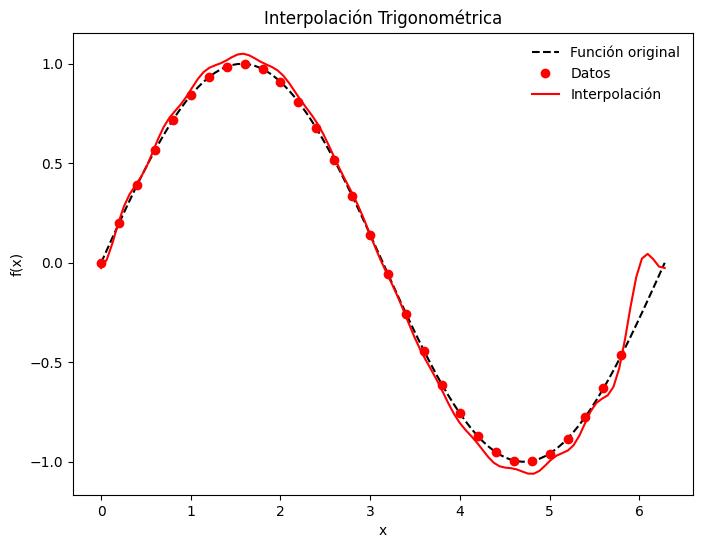

In [8]:
func = lambda x: np.sin(x)
n = 30 # nodos
dataxs, datays = generatedata(n, func, nodes=" ", interval=[0, 6], endpoint=False) ## datos, donde se encuentra el intervalo pedido
aparams, bparams = computeparams(dataxs, datays)
x = 0.5 # interpolar en uun nuevo punto
pofx = triginterp(aparams, bparams, x)

print(x, func(x))
print(pofx)

# Gráfica
x_vals = np.linspace(0, 2 * np.pi, 100)
fig = plt.figure(figsize=(8, 6))
plt.plot(x_vals, func(x_vals), 'k--', label='Función original')
daty = [triginterp(aparams, bparams, i) for i in x_vals]

plt.plot(dataxs, datays, 'ro', label='Datos')
plt.plot(x_vals, daty, 'r-', label='Interpolación')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación Trigonométrica')
plt.show()

Integral Guassiana

In [5]:
func = lambda x: np.sin(x)
intervalo = [0, np.pi]
n = 5
max_iter = 200

resultado = gaussint(func, intervalo, n)
print(f"Resultado de la integral: {resultado}")

Resultado de la integral: 1.999999951540901


Integral Gaussiana de dos dimensiones

In [5]:
# Imprimir resultados
val = gaussint_2d(f= lambda x, y: np.sin(x) + y, interv_x = [0, np.pi], interv_y=[-1, 1], n=4)
print('El resultado de la integración doble es', val)

El resultado de la integración doble es 3.9999680906372137


EDOS

EDO método Euler hacía adelante

<function eulerforw at 0x00000229F51CE3E0>


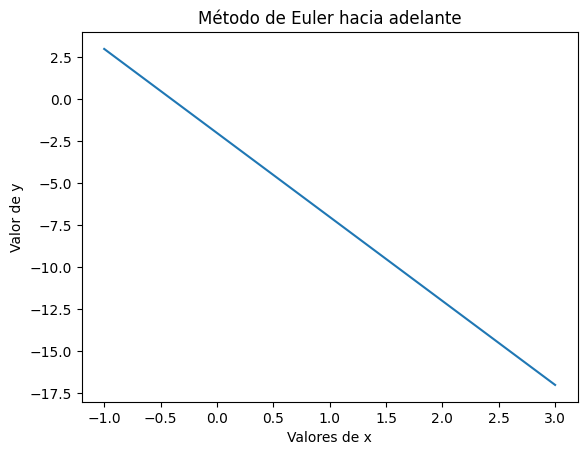

In [7]:
x1, y1 = eulerforw(x0 = -1, xf = 3, y0 = 3, n = 2, func = lambda x, y: -2*y - x) 
print(eulerforw)
plt.plot(x1, y1)
plt.xlabel('Valores de x')
plt.ylabel('Valor de y')
plt.title('Método de Euler hacia adelante')
plt.show()

Runge Kutta

<function runge_kutta at 0x00000229F51CE520>


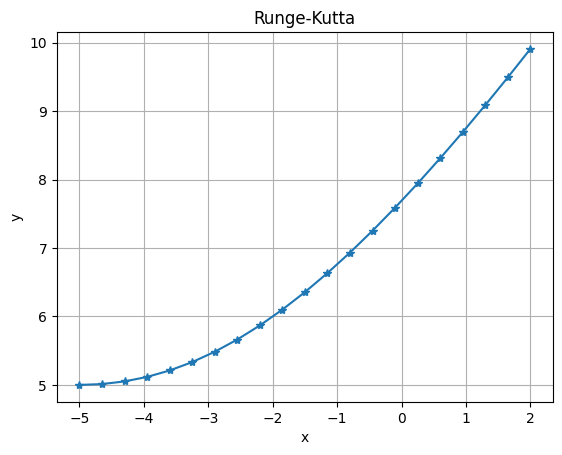

In [8]:
x3, y3 = runge_kutta(x0=-5, y0=5, xn=2, n=20, f=lambda x, y: x/y + 1)
print(runge_kutta)

# Gráfica
plt.plot(x3, y3, '*-')
plt.title('Runge-Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Método de Shooting

Derivación

[ 2.47368421  2.94736842  3.89473684  4.84210526  5.78947368  6.73684211
  7.68421053  8.63157895  9.57894737 10.52631579 11.47368421 12.42105263
 13.36842105 14.31578947 15.26315789 16.21052632 17.15789474 18.10526316
 19.05263158 19.52631579]


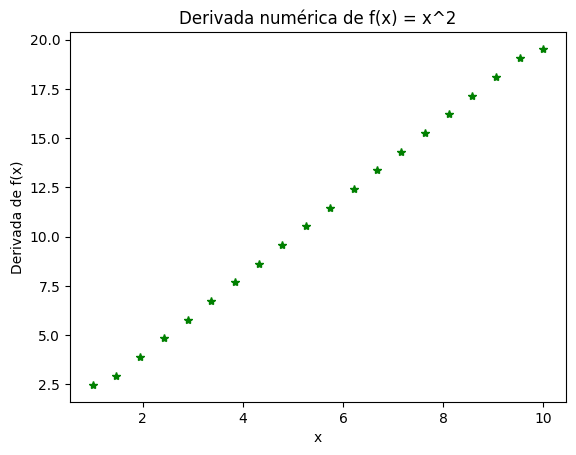

In [7]:
a = 1
b=10
n=20
x, yp = deriv(lambda x: x**2, a, b, n)
print(yp)

plt.plot(x, yp, 'g*')
plt.xlabel('x')
plt.ylabel('Derivada de f(x)')
plt.title('Derivada numérica de f(x) = x^2')
plt.show()

Segunda derivada 

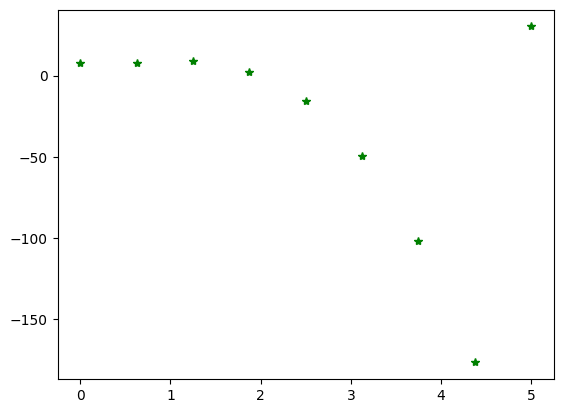

In [5]:
x, ypp = deriv2(f = lambda x: x**3 + 2*x**2, a=0, b=5, n=9)
plt.plot(x, ypp, 'g*')
plt.show()